# Exercise - Multiple Linear Regression



It's time for you to apply your knowledge to a new dataset. So that not too much changes come at once, we will stick to the cars topic and work with the **car seats data**. A company that makes car seats would like to construct a model to predict sales and they need your help!

You will find the file called `carseats.csv` in the data folder. It contains 400 observations on the following 11 variables:
* **Sales**:         Unit sales (in thousands) at each location
* **CompPrice**:     Price charged by competitor at each location
* **Income**:        Community income level (in thousands of dollars)
* **Advertising**:   Local advertising budget for company at each location (in thousands of dollars)
* **Population**:    Population size in region (in thousands)
* **Price**:         Price company charges for car seats at each site
* **ShelveLoc**:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* **Age**:           Average age of the local population
* **Education**:     Education level at each location
* **Urban**:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* **US**:            A factor with levels No and Yes to indicate whether the store is in the US or not

**(a) Load the data**

In [6]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

In [3]:
df = pd.read_csv("data/carseats.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**(b) Visualize the data with the appropriate plots.** 

<br>
<details><summary>
Click here for a hint…
</summary>
Check the documentation for seaborn's pair plots. 
</details>

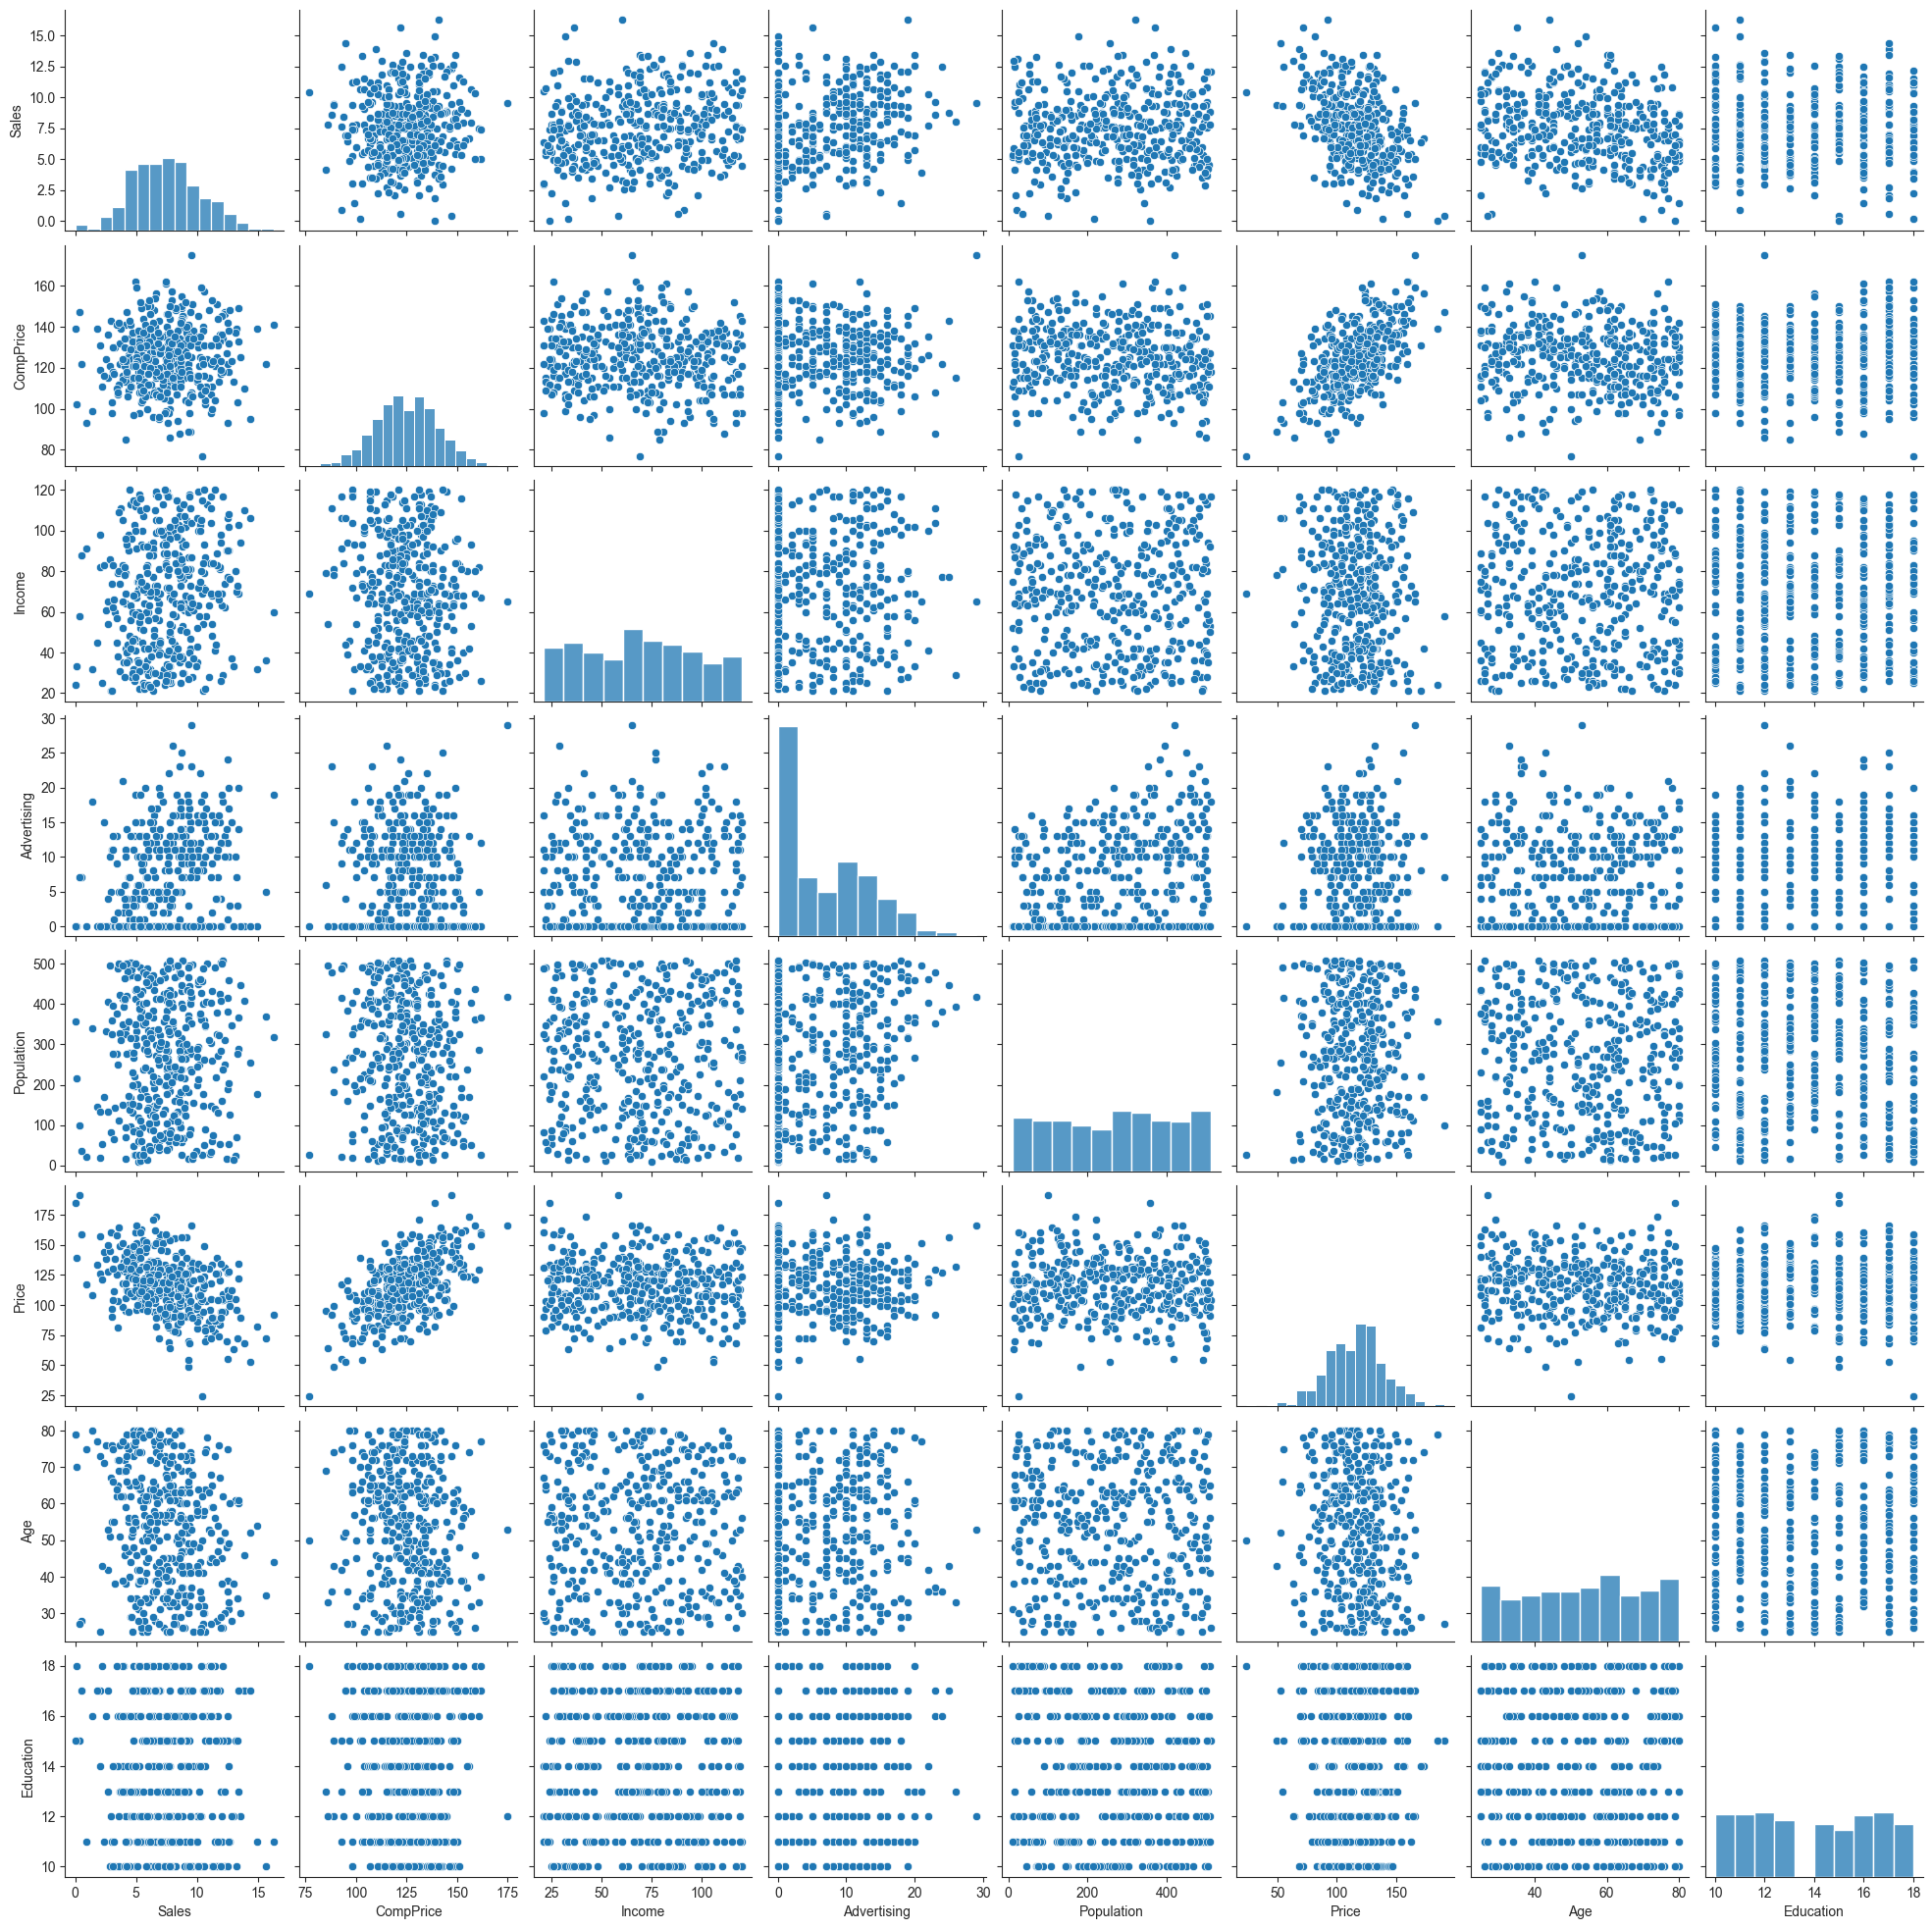

In [5]:
sns.pairplot(df)

**(c) What trends do you see in the data?**

**(d) Find the single best predictor for a simple linear regression.**

<br>
<details><summary>
Click here for a hint…
</summary>
Fit a linear model to all possible explanatory variables and pick best one.
</details>

In [29]:
X_1 = df[['Price']]
y_1 = df['Sales']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=101)

# Create the model
model = LinearRegression()

# Fit the  model
model.fit(X_train, y_train)

# Predict the model
predictions = model.predict(X_test)

# Print the stats
R_1 = model.score(X_test, y_test)
print(f'R^2: {R_1}')

R^2: 0.30114404027484154


**(e) Fit a model with all possible explanatory variables.**

In [33]:
X_2 = df.drop(columns=['Sales', 'US', 'ShelveLoc', 'Urban'], axis=1)
y_2 = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=101)

# Create the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Print the stats
R_2 = model.score(X_test, y_test)
print(f'R^2: {R_2}')

R^2: 0.5863982964057886


**(f) What's the best model according to $R^2$?**

**(g) Remove a couple of explanatory variables. How does $R^2$ change?**

In [34]:
X_3 = df.drop(columns=['Sales', 'US', 'ShelveLoc', 'Urban', 'Population'], axis=1)
y_3 = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=101)

# Create the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

R_3 = model.score(X_test, y_test)
print(f'R^2: {R_3}')

R^2: 0.58982088406318


**(h) Repeat the process for the adjusted $R^2$.**

In [28]:
def adjusted_r_squared(r_squared, X):
    adjusted_r2 = 1 - ((1 - r_squared) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [35]:
adj_R_1 = adjusted_r_squared(R_1, X_1)
adj_R_2 = adjusted_r_squared(R_2, X_2)
adj_R_3 = adjusted_r_squared(R_3, X_3)

print(adj_R_1, adj_R_2, adj_R_3)

0.29938812077804466 0.579012551698749 0.5835586074839918


**(i) What are your most interesting findings?**

<br>
<br> 
<br>

----